# Convolutions

Convolutions are a way to apply a filter to a matrix or image using a defined kernel. This filter can highlight certain attributes or features of the matrix or image. Convolutions are often used in Convolutional Neural Networks (CNN).

In this notebook we will go over how dilated convolutions work and different kernels that can be applied.

#### Video

https://www.youtube.com/watch?v=K3LsUl04Oa4&list=PLL0SWcFqypCl4lrzk1dMWwTUrzQZFt7y0&index=25 (Convolutional Neural Networks)

## Setup

In [28]:
#example taken from https://www.geeksforgeeks.org/dilated-convolution/
import numpy as np
from  scipy.signal import convolve2d
import cv2
import matplotlib.pyplot as plt
 
np.random.seed(678)
tf.random.set_seed(6789)

### Set up our matrix and add 1's in the middle to create a difference in pixel value

In [29]:
# Initializing a 9x9 matrix of zeros.
mat_size = 9
matrix = np.zeros((mat_size,mat_size)).astype(np.float32)
 
# Assigning 1's in the middle of matrix
# to create a random input matrix
for x in range(4,7):
    for y in range(3,6):
        matrix[y,x] = 1
 

### Experimental Kernel

In [30]:
# Creating an experimental kernel for test
kernel = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
]).astype(np.float32)

#### Edge Detection Kernels
- Edge detection kernels help us find the boundaries or edges in an image. This is useful because edges often represent important parts of the image, like the outline of a tree or the borders of microstructures.

- The kernel slides over the image and looks for places where there’s a big change in brightness. For example, moving from a dark area to a bright area.

In [31]:
kernel = np.array([
        [-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]
    ]).astype(np.float32)

### Blurring Kernel 

- Blurring kernels make the image look smoother by averaging the pixels around each spot. This is useful for reducing noise or making an image look softer.

- The kernel takes the average of the pixels it covers, which means every pixel gets a value closer to its neighbors. The bigger the kernel, the blurrier the image becomes because it’s averaging over a larger area.


In [32]:
kernel = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
]).astype(np.float32)

### Sharpening Kernel 

- Sharpening kernels make the edges in an image more distinct and clear. This is the opposite of blurring; instead of making things soft, it makes them stand out more.

- The kernel increases the contrast between a pixel and its neighbors by emphasizing the pixel in the center more and subtracting the neighboring pixel values. It’s like making the darks darker and the lights lighter right around the edges.

In [33]:
kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
]).astype(np.float32)

In [34]:
# self-initializing a dilated kernel.
# ======[dilation factor = 3]======
dilated_kernel = np.array([
    [1,0,0,2,0,0,3],
    [0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0],
    [4,0,0,5,0,0,6],
    [0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0],
    [7,0,0,8,0,0,9]
])
 
print('\n')
print("Dilated kernel Shape : ",dilated_kernel.shape)
print(dilated_kernel)
 
print('\n')
print("DILATED CONVOLUTION RESULTS [Dilation Factor = 3]")
output = convolve2d(matrix,dilated_kernel,mode='valid')
print("Numpy Results Shape: ",output.shape)
print(output)



Dilated kernel Shape :  (7, 7)
[[1 0 0 2 0 0 3]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [4 0 0 5 0 0 6]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [7 0 0 8 0 0 9]]


DILATED CONVOLUTION RESULTS [Dilation Factor = 3]
Numpy Results Shape:  (3, 3)
[[4. 5. 5.]
 [4. 5. 5.]
 [4. 5. 5.]]


## Visualization

Now that we've covered a few of the convolution kernels and what they do, lets apply them to an image to see how it changes with each step. We will use an image of dendrites.

In [35]:
# Load the image
image_path = 'dendrite2.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale


### Kernel Definitions

Lets define the kernels we will be using. These kernels are the same ones discussed above, but with a 3x3 version and a 5x5 version to show how size can affect the image output. 

#### Edge Kernel

- 3x3 Edge Detection: This small kernel is great for detecting fine details. It focuses on smaller edges but may include more noise

- 5x5 Edge Detection: This bigger kernel smooths out the noise a bit and focuses more on broader, more significant edges


#### Blurring Kernel 

- 3x3 Blurring: A small blur that softens the image just a little bit, useful for minor smoothing.

- 5x5 Blurring: This larger kernel creates a stronger blur, which can remove small details.


#### Sharpening Kernel

- 3x3 Sharpening: A basic sharpening kernel that makes edges pop without too much alteration. 

- 5x5 Sharpening: This larger kernel is more intense and spreads the sharpening effect over a bigger area, which can be great for highlighting larger structures in an image but might also introduce some artifacts if overused.



In [40]:

# Edge Detection Kernels
edge_kernels = [
    (np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]).astype(np.float32), '3x3 Edge Detection'),
    (np.array([[-1, -1, -1, -1, -1], [-1, 1, 2, 1, -1], [-1, 2, 4, 2, -1], [-1, 1, 2, 1, -1], [-1, -1, -1, -1, -1]]).astype(np.float32), '5x5 Edge Detection'),
]

# Blurring Kernels
blur_kernels = [
    (np.ones((3, 3), np.float32) / 9, '3x3 Blurring'),
    (np.ones((5, 5), np.float32) / 25, '5x5 Blurring'),
]

# Sharpening Kernels
sharpen_kernels = [
    (np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]).astype(np.float32), '3x3 Sharpening'),
    (np.array([[-1, -1, -1, -1, -1], [-1,  2,  2,  2, -1], [-1,  2,  13,  2, -1], [-1,  2,  2,  2, -1], [-1, -1, -1, -1, -1]]).astype(np.float32) / 8.0, '5x5 Sharpening'),
]


Lastly, we will apply these convolutions and visualize the resulting images.

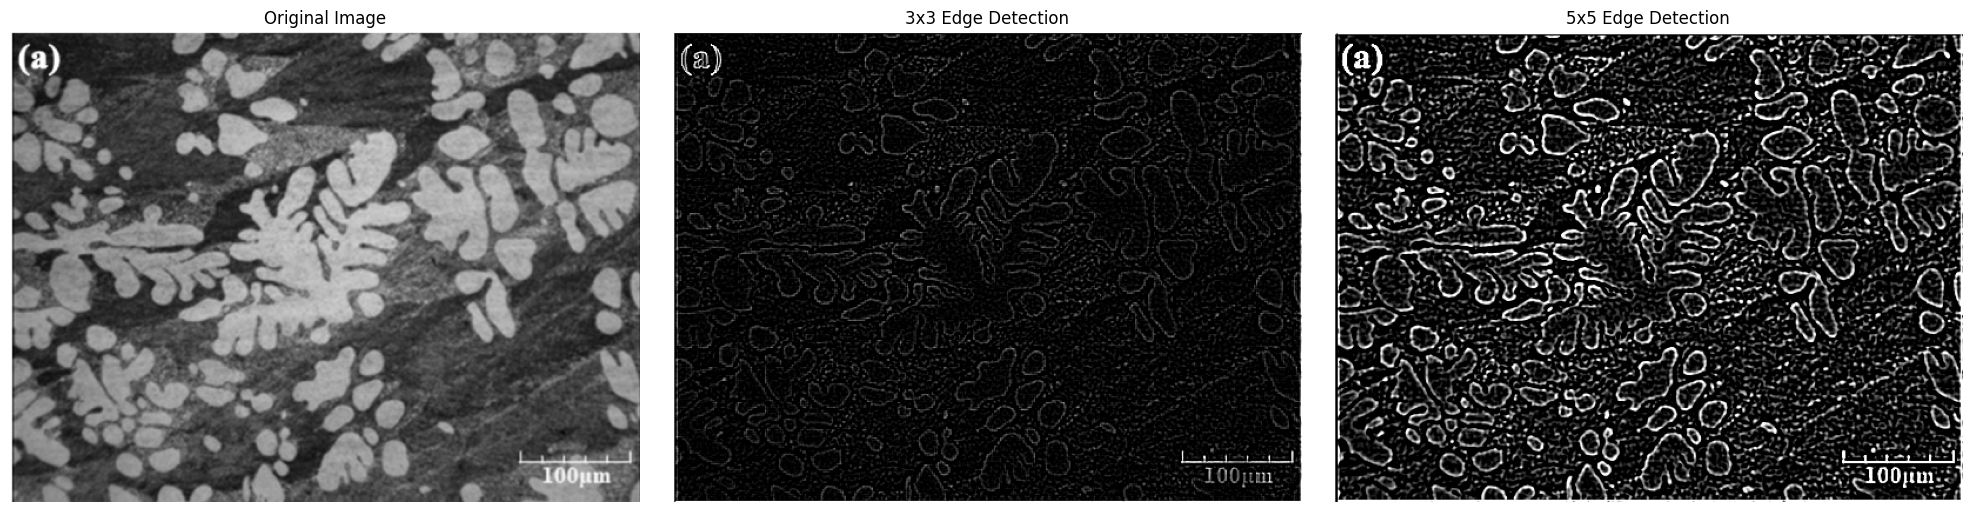

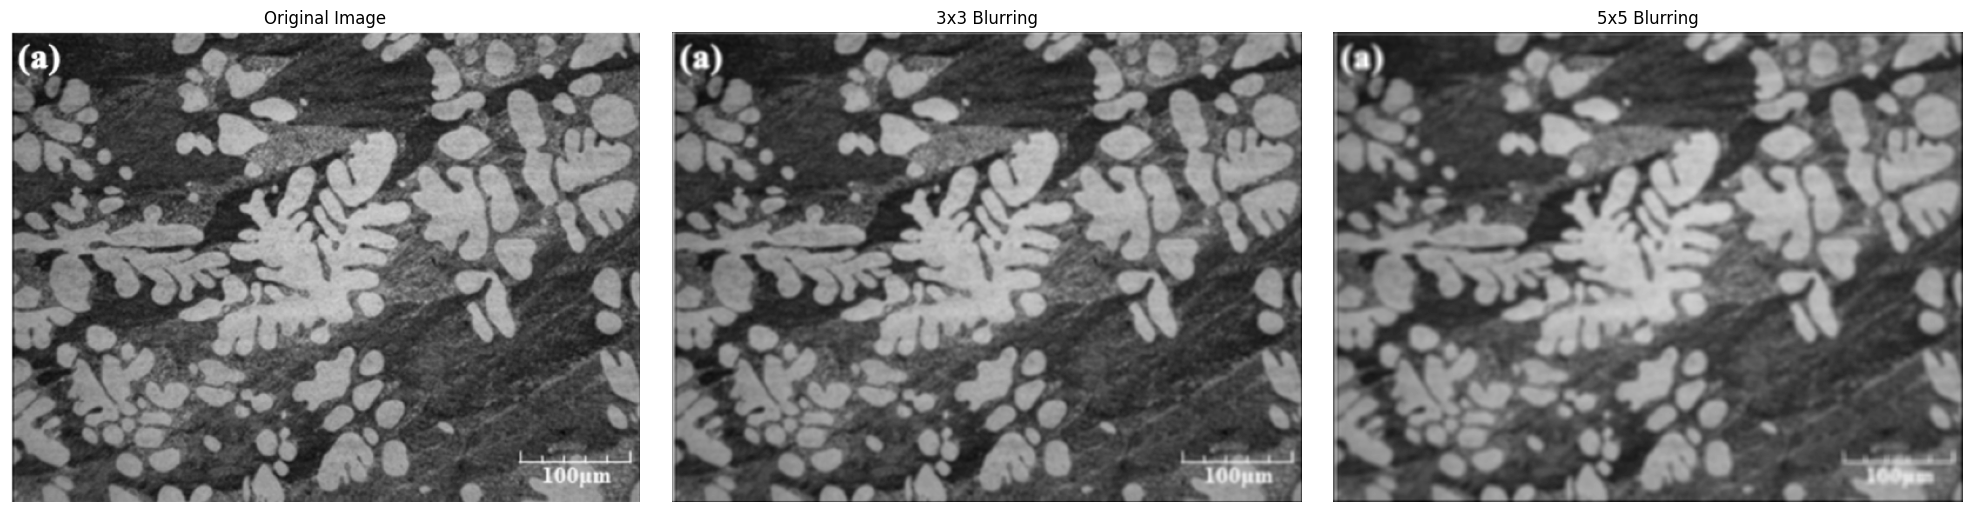

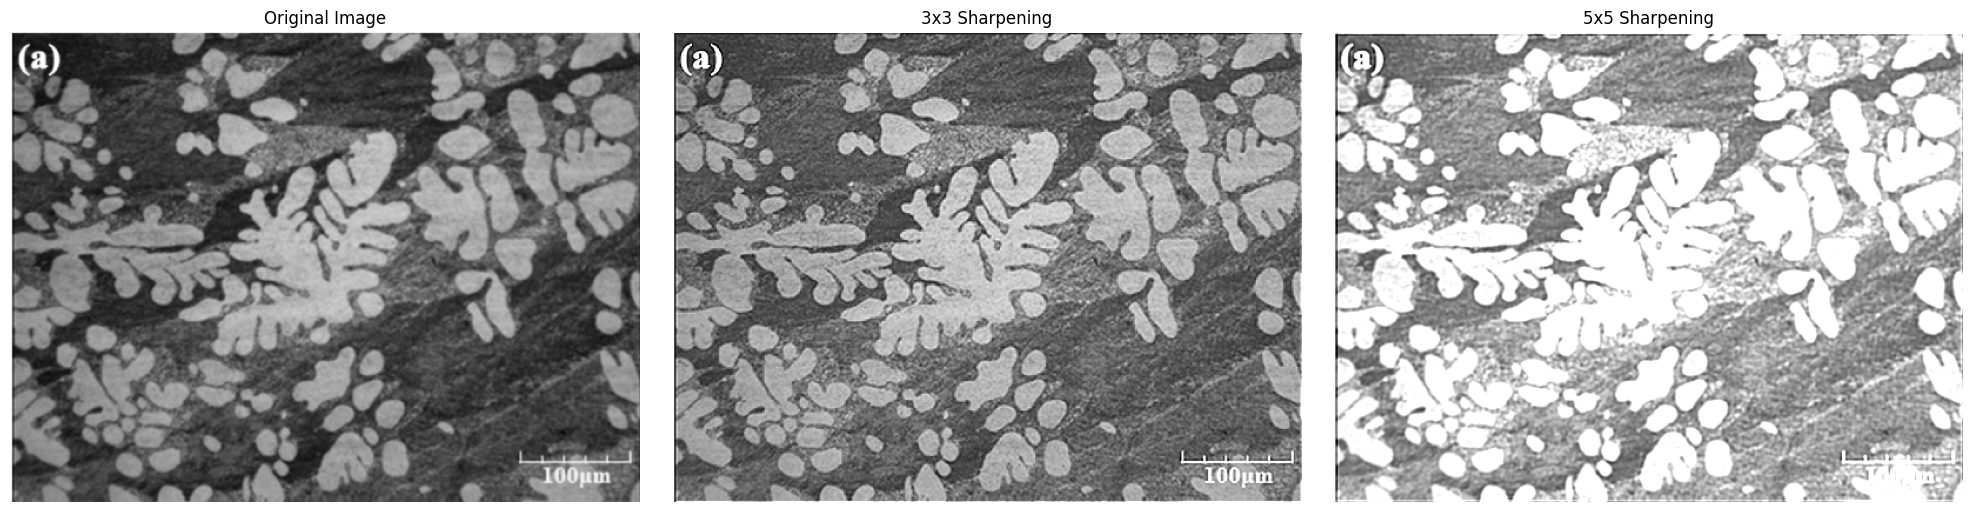

In [41]:

# Function to apply convolution using scipy.signal.convolve2d and display results with the original image
def apply_convolution_and_display(image, kernels):
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Apply and display convolutions for each kernel
    for i, (kernel, title) in enumerate(kernels):
        # Use scipy.signal.convolve2d with mode='same' to keep the output the same size as the input image
        convolved = convolve2d(image, kernel, mode='same', boundary='fill', fillvalue=0)
        # Normalize and clip the convolved image to range 0-255
        convolved = np.clip(convolved, 0, 255).astype(np.uint8)

        axes[i+1].imshow(convolved, cmap='gray')
        axes[i+1].set_title(title)
        axes[i+1].axis('off')

    plt.tight_layout()
    plt.show()

# Apply and display each set of convolutions for edge detection, blurring, and sharpening
apply_convolution_and_display(image, edge_kernels)
apply_convolution_and_display(image, blur_kernels)
apply_convolution_and_display(image, sharpen_kernels)